# Exercício 10

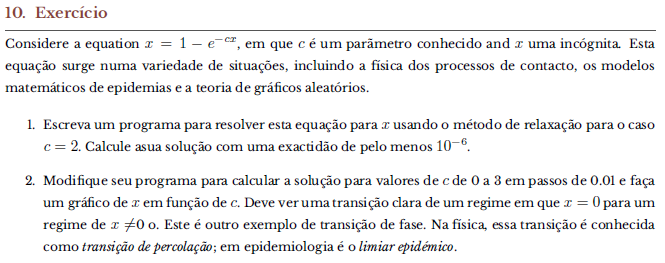

[Página do Notion](https://www.notion.so/guilhermebaos/13-M-todo-da-Relaxa-o-9f1c307a29914ca99cc6fd920bfd14f8?pvs=4).

In [2]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## Alínea 1

Vamos estudar a convergência do método. Supondo que existe uma solução $x^*$ e que a estimativa inicial é suficientemente próxima da solução o método converge para a solução se:

$$
\begin{align*}
f(x) &= 1 - e^{-cx}
\\\\
\left|\frac{df}{dx}(x^*)\right| < 1 &\hArr |c|e^{-cx^*} < 1 \hArr
\\\\
&\hArr \begin{cases}
e^{-cx^*} < \frac1c &\text{se } c > 0
\\\\
e^{-cx^*} > -\frac1c &\text{se } c < 0
\end{cases} \hArr
\\\\
&\hArr \begin{cases}
x^* > \frac{\ln(c)}{c}
\\\\
x^* < \frac{\ln(-c)}{c}
\end{cases}
\end{align*}
$$

Notamos ainda que:
- Para qualquer $c$, $x = 0$ é solução
- Para $c < 0$ a única solução é $x = 0$:
    - Caso $x > 0$ então o lado direito da equação é menor que $0$
    - Caso $x < 0$ então o lado esquerdo da equação é maior que $0$

In [3]:
def relax(func: Callable, x0: float = 1, eps: float = 10e-6) -> float:
    """
        Resolve a equação `func(x) = x` usando o método da relaxação começando com a estimativa `x0` e parando após o passo ser menor que `eps`
    """

    passo = eps + 1
    while passo > eps:
        x1 = func(x0)
        passo = abs(x1 - x0)
        x0 = x1
    
    return x0

In [4]:
def problema(c: float) -> Callable:
    return lambda x: 1 - np.exp(-c * x)


# Função a resolver
f = problema(2)

# Solução
print(relax(f))

0.7968151643557075


## Alínea 2

C:\Users\Gui\AppData\Local\Temp\ipykernel_17584\10586406.py:16: RuntimeWarning: divide by zero encountered in log
  plt.plot(cc, np.log(cc)/c, label="Condição de Convergência")


Text(0, 0.5, 'Solução da equação $x = 1 - e^{-cx}$')

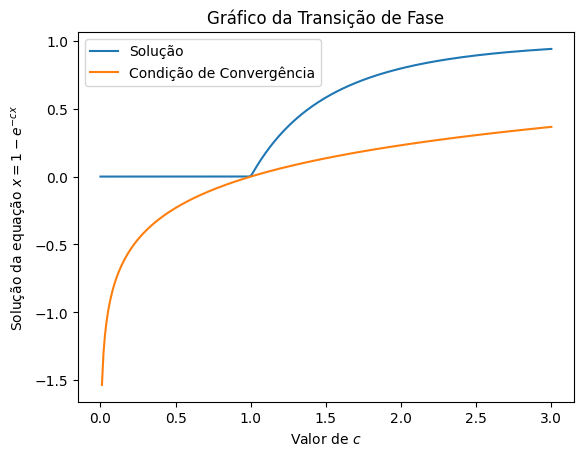

In [6]:
# Parâmetros
start = 0
end = 3
step = 0.01

N = int((end - start) / step) + 1

# Equação para todos os c
xx = []
cc = np.linspace(start, end, N)
for c in cc:
    xx += [relax(problema(c))]

# Representar graficamente as soluções
plt.plot(cc, xx, label="Solução")
plt.plot(cc, np.log(cc)/c, label="Condição de Convergência")
plt.legend()
plt.title("Gráfico da Transição de Fase")
plt.xlabel("Valor de $c$")
plt.ylabel("Solução da equação $x = 1 - e^{-cx}$")